# MACHINE LEARINING DIABETES PREDICTION

In [1]:
# Import all the necessary libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import * 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.ticker as tick
from sklearn.metrics  import accuracy_score
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import pickle


## EDA

In [2]:
# Load the dataset
pd.set_option('display.expand_frame_repr', False)

df = pd.read_csv('C:\\Users\\lucag\\Desktop\\Project_ML\\dataset\\diabetes_data.csv')
cols = list(df.columns)
print( "Colonne: ", cols, "\n") 


Colonne:  ['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Stroke', 'HighBP', 'Diabetes'] 



In [3]:

# Visualize of the shape of the dataset
print(df.shape)

# Visualize of the first 5 rows of the dataset
print(df.head())


(70692, 18)
    Age  Sex  HighChol  CholCheck   BMI  Smoker  HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  GenHlth  MentHlth  PhysHlth  DiffWalk  Stroke  HighBP  Diabetes
0   4.0  1.0       0.0        1.0  26.0     0.0                   0.0           1.0     0.0      1.0                0.0      3.0       5.0      30.0       0.0     0.0     1.0       0.0
1  12.0  1.0       1.0        1.0  26.0     1.0                   0.0           0.0     1.0      0.0                0.0      3.0       0.0       0.0       0.0     1.0     1.0       0.0
2  13.0  1.0       0.0        1.0  26.0     0.0                   0.0           1.0     1.0      1.0                0.0      1.0       0.0      10.0       0.0     0.0     0.0       0.0
3  11.0  1.0       1.0        1.0  28.0     1.0                   0.0           1.0     1.0      1.0                0.0      3.0       0.0       3.0       0.0     0.0     1.0       0.0
4   8.0  0.0       0.0        1.0  29.0     1.0                

In [4]:

# Dataset information
print(df.info())

# Visualizzation of the number of missing values for each column
print(df.nunique())

# Statistics of the dataset columns, such as mean, standard deviation, minimum values, percentile values and maximum values
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

Diabetes
0.0    35346
1.0    35346
Name: count, dtype: int64
Controllo valori N/A:
Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64



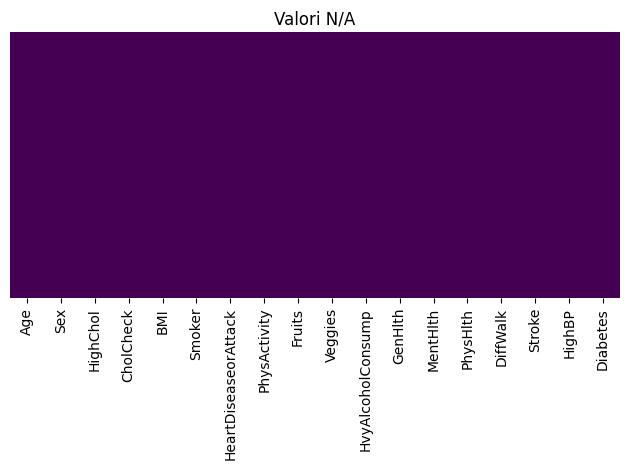

In [5]:
# Visualize how many people have diabetes and how many don't have diabetes
print(df['Diabetes'].value_counts())

# I check the presence of N/A values
print(f"Controllo valori N/A:\n{df.isnull().sum()}\n")

sns.heatmap(data=df.isnull(), yticklabels=False, cbar=False, cmap="viridis")
plt.title("Valori N/A")
plt.tight_layout()
plt.show()


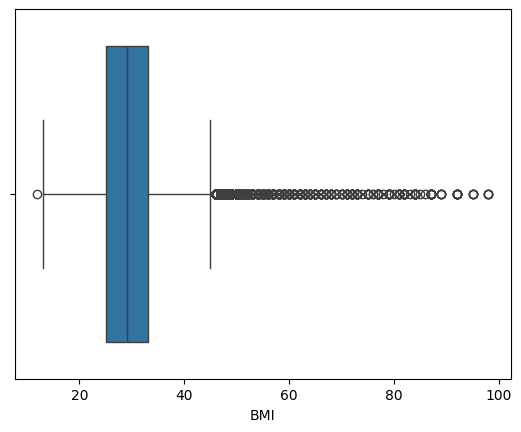

In [6]:
# I manage the "BMI" feature Body Mass Index:
# The analysis of BMI could provide information on the distribution of body weight within the dataset
# and its relationship with general health

sns.boxplot(x='BMI', data=df)
plt.show()


Valori di 'BMI' maggiori-uguali di 70 sono: 154



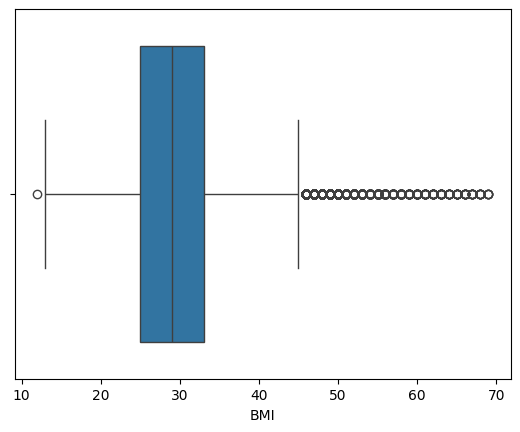

(70538, 18)


In [7]:
# Delete samples with BMI values > 70 considered as outliers
print(f"Valori di 'BMI' maggiori-uguali di 70 sono: {((df.BMI >= 70).sum())}\n")

df.drop(df.index[df['BMI'] >= 70], inplace=True)
df.reset_index(drop=True, inplace=True)
sns.boxplot(x='BMI', data=df)
plt.show()
print(df.shape)

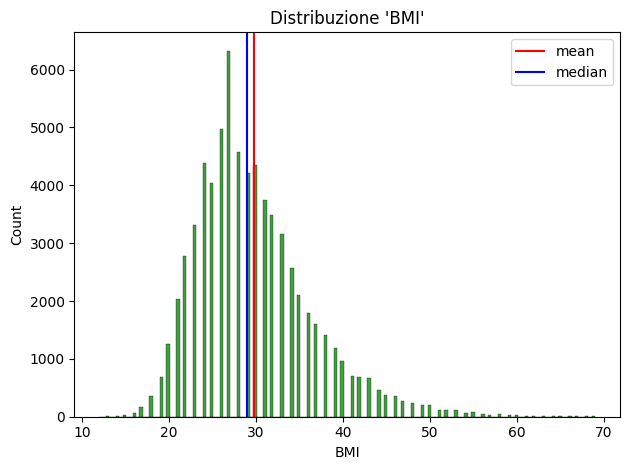

Media di 'BMI': 29.74687402534804
Mediana di 'BMI': 29.0
Asimmetria di 'BMI': 1.118796858671015
Asimmetria a destra


In [8]:

sns.histplot(df.BMI, color='green')
plt.axvline(df['BMI'].mean(), label='mean', color='red')
plt.axvline(df['BMI'].median(), label='median', color='blue')
plt.legend()
plt.title("Distribuzione 'BMI'")
plt.tight_layout()
plt.show()

print(f"Media di 'BMI': {df['BMI'].mean()}")
print(f"Mediana di 'BMI': {df['BMI'].median()}")
#print(f"Asimmetria di 'BMI': {df['BMI'].skew()}")

asimmetria = df['BMI'].skew()
print(f"Asimmetria di 'BMI': {asimmetria}")
if asimmetria > 0:
    print("Asimmetria a destra")
elif asimmetria < 0:
    print("Asimmetria a sinistra")



In [9]:
# Calculate the average of the "BMI" feature for male "1.0" and for female "0.0"

media_bmi_maschile = df[df['Sex'] == 1.0]['BMI'].mean()
media_bmi_femminile = df[df['Sex'] == 0.0]['BMI'].mean()
print(f"Media BMI per il sesso maschile: {media_bmi_maschile}")
print(f"Media BMI per il sesso femminile: {media_bmi_femminile}")


Media BMI per il sesso maschile: 29.754971612943258
Media BMI per il sesso femminile: 29.74006004438063


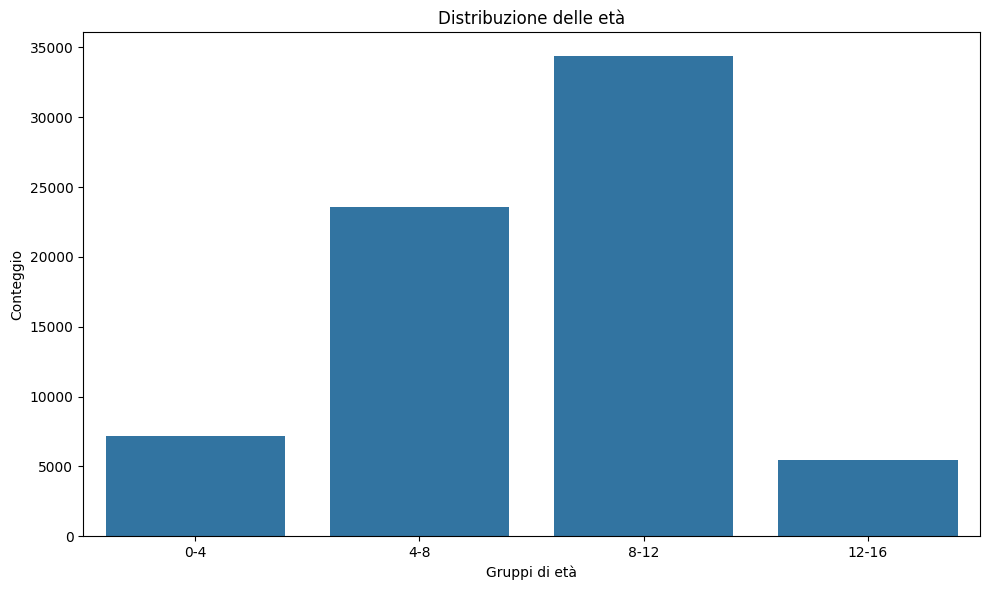

In [10]:
# Manage the "Age" features
# Divide the "Age" feature into intervals
bins = [0, 4, 8, 12, 16]
labels = ['0-4', '4-8', '8-12', '12-16']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Histogram to visualize the distribution of ages
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age_Group')
plt.title('Distribuzione delle età')
plt.xlabel('Gruppi di età')
plt.ylabel('Conteggio')
plt.tight_layout()
plt.show()


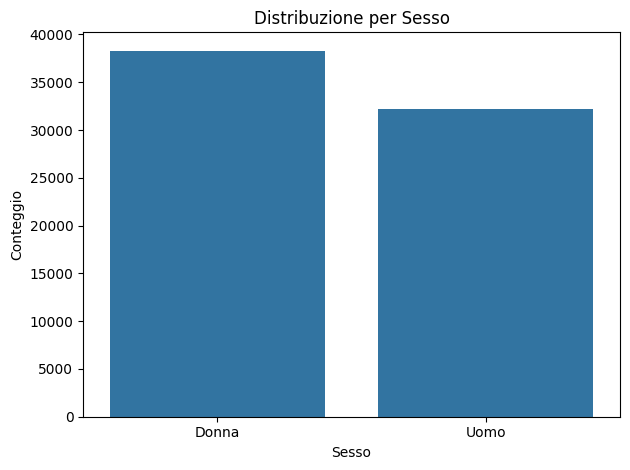

In [11]:

labels = ['Donna', 'Uomo']
# Create a bar graph of the "Sex" count
sns.countplot(data=df, x='Sex')

# Set custom labels on the x-axis 
plt.xticks(ticks=range(2), labels=labels)
plt.title('Distribuzione per Sesso')
plt.xlabel('Sesso')
plt.ylabel('Conteggio')
plt.tight_layout()
plt.show()


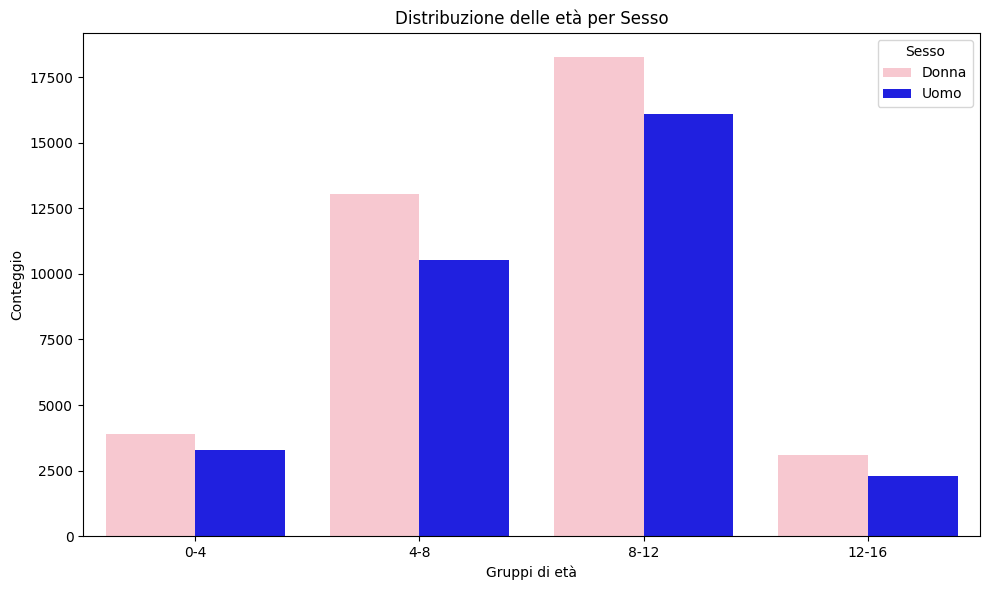

In [12]:
# Create a bar graph to compare the age distribution between man and women
plt.figure(figsize=(10, 6))
palette = {0: 'pink', 1: 'blue'}
sns.countplot(data=df, x='Age_Group', hue='Sex', palette=palette)
plt.title('Distribuzione delle età per Sesso')
plt.xlabel('Gruppi di età')
plt.ylabel('Conteggio')
plt.legend(title='Sesso', loc='upper right', labels=['Donna', 'Uomo'])
plt.tight_layout()
plt.show()

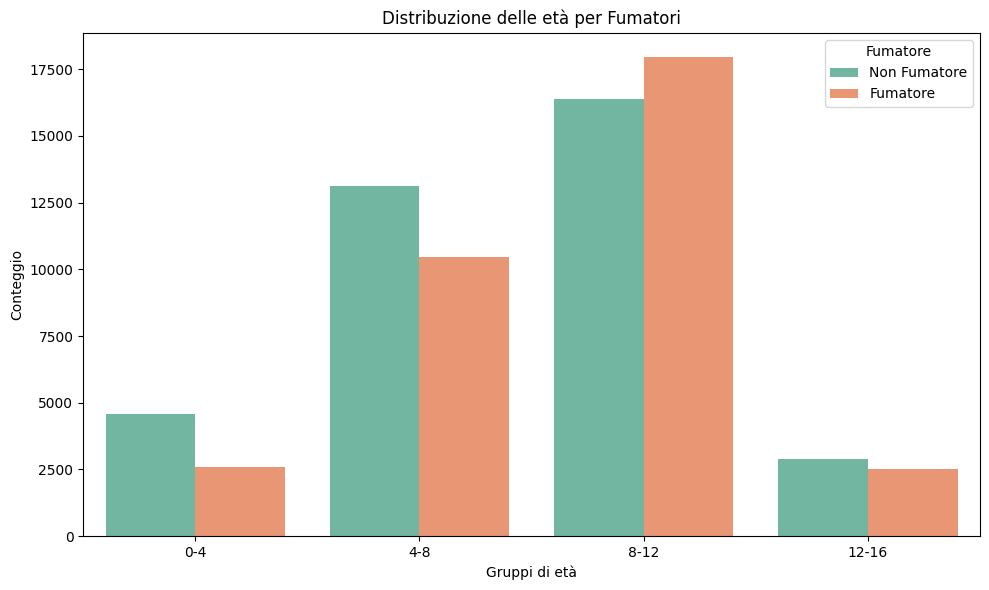

In [13]:
# Create a bar graphe to compare the age distribution between smokers and non-smokers
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age_Group', hue='Smoker', palette='Set2')
plt.title('Distribuzione delle età per Fumatori')
plt.xlabel('Gruppi di età')
plt.ylabel('Conteggio')
plt.legend(title='Fumatore', loc='upper right', labels=['Non Fumatore', 'Fumatore'])
plt.tight_layout()
plt.show()

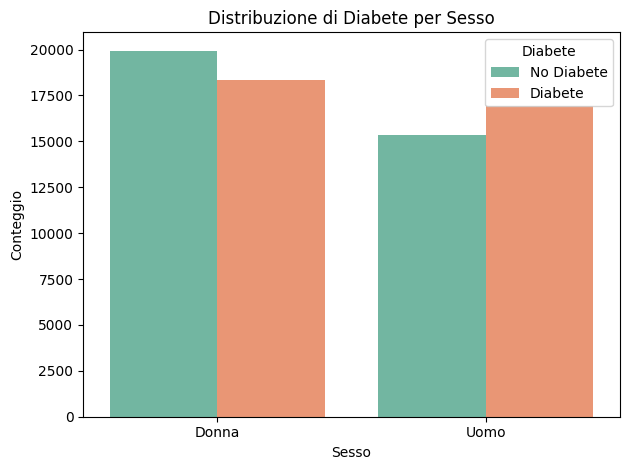

In [14]:
# Gender and diabetes contingency table
pd.crosstab(df['Sex'], df['Diabetes'], margins=True).style.background_gradient(cmap='coolwarm')

# Bar graph for distribution of Diabetes by Gender
# Define custom labels 
labels = ['Donna', 'Uomo']

# Create a bar chart of the 'Diabetes' count for each 'Sex' category
sns.countplot(data=df, x='Sex', hue='Diabetes', palette='Set2')

# Set custom labels on the x-axis
plt.xticks(ticks=range(2), labels=labels)

plt.title('Distribuzione di Diabete per Sesso')
plt.xlabel('Sesso')
plt.ylabel('Conteggio')
plt.legend(title='Diabete', loc='upper right', labels=['No Diabete', 'Diabete'])
plt.tight_layout()
plt.show()


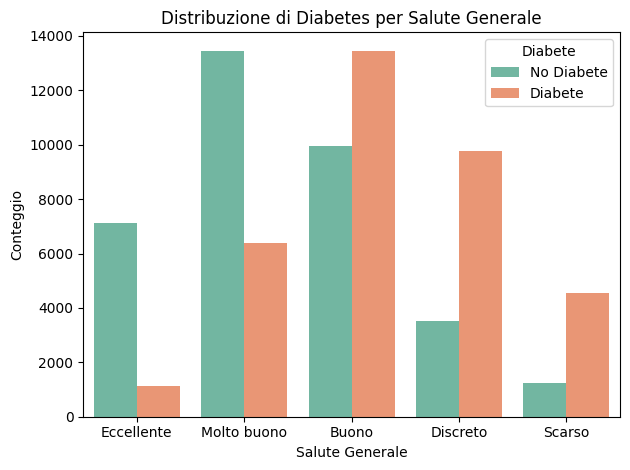

In [15]:
# Grapg for the distribution of Diabetes by General Health
# Define custom labels
labels = ['Eccellente', 'Molto buono', 'Buono', 'Discreto', 'Scarso']

# Create a bar chart of the 'Diabetes' count for each 'GenHlth' category
sns.countplot(data=df, x='GenHlth', hue='Diabetes', palette='Set2')

plt.xticks(ticks=range(5), labels=labels)

plt.title('Distribuzione di Diabetes per Salute Generale')
plt.xlabel('Salute Generale')
plt.ylabel('Conteggio')
plt.legend(title='Diabete', loc='upper right', labels=['No Diabete', 'Diabete'])
plt.tight_layout()
plt.show()

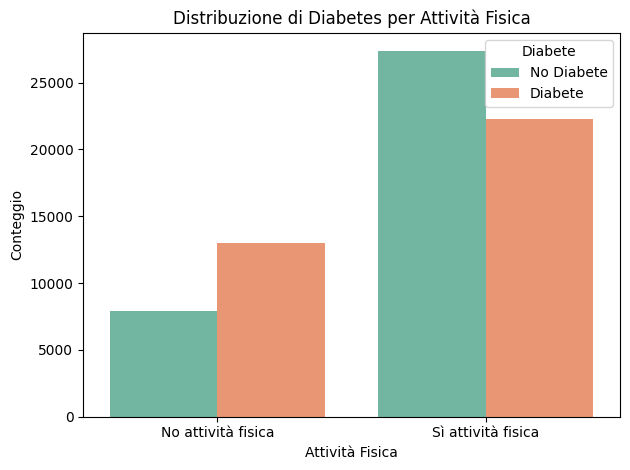

In [16]:
#Graph for the distribution of Diabetes by Physical Activity
# Define custom labels
labels = ['No attività fisica', 'Sì attività fisica']

# Create a bar chart of the 'Diabetes' count for each 'PhysActivity' category
sns.countplot(data=df, x='PhysActivity', hue='Diabetes', palette='Set2')

plt.xticks(ticks=range(2), labels=labels)

plt.title('Distribuzione di Diabetes per Attività Fisica')
plt.xlabel('Attività Fisica')
plt.ylabel('Conteggio')
plt.legend(title='Diabete', loc='upper right', labels=['No Diabete', 'Diabete'])
plt.tight_layout()
plt.show()


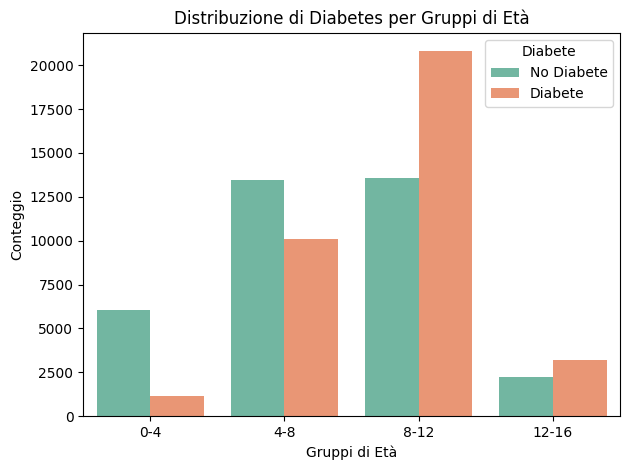

In [17]:
# Graph for the distribution of Diabetes by Age Groups
sns.countplot(data=df, x='Age_Group', hue='Diabetes', palette='Set2')
plt.title('Distribuzione di Diabetes per Gruppi di Età')
plt.xlabel('Gruppi di Età')
plt.ylabel('Conteggio')
plt.legend(title='Diabete', loc='upper right', labels=['No Diabete', 'Diabete'])
plt.tight_layout()
plt.show()


0     3
1    11
2    12
3    10
4     7
Name: Age_Group, dtype: int64


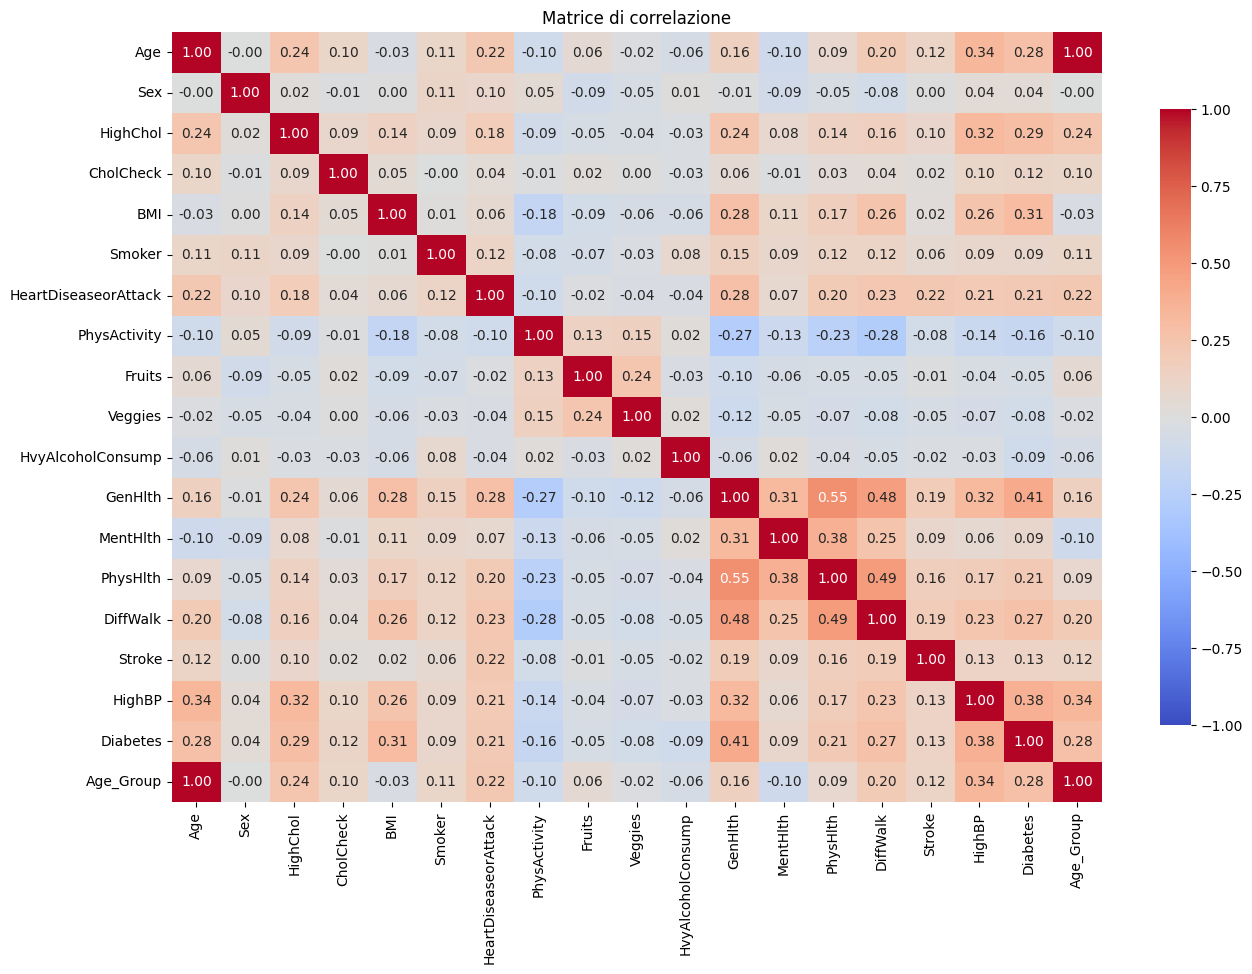

In [18]:
# Converting the feature 'Age' to integers to be used by corr()
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()
# Encode the 'Age_Group' column
df['Age_Group'] = label_encoder.fit_transform(df['Age'])

# Visualize the first 5 rows of the 'Age_Group' column
print(df['Age_Group'].head())

# Calculating the correlation between the features
corr_matrix = df.corr()

# Augment the size of the graph
plt.figure(figsize=(15, 10))

# Create heatmap without mask
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            cbar_kws={"shrink": .8}, vmin=-1, vmax=1, center= 0)

plt.title("Matrice di correlazione")
plt.show()

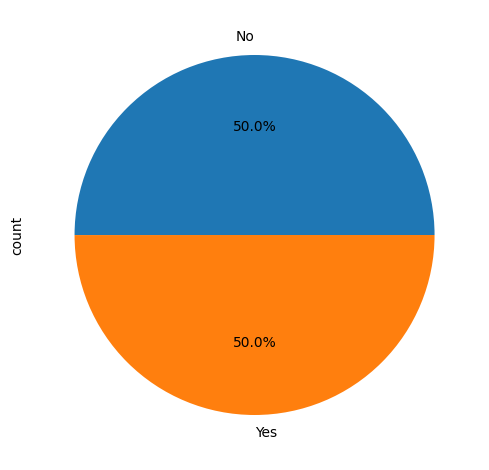

Diabetes
0.0    35273
1.0    35265
Name: count, dtype: int64



In [19]:
# Percentage of the target "Diabetes"
figure = (df["Diabetes"].value_counts() * 100.0 / len(df)) \
    .plot.pie(autopct='%.1f%%', labels=['No', 'Yes'])
figure.yaxis.set_major_formatter(tick.PercentFormatter())
plt.tight_layout()
plt.show()

print(f"{df.Diabetes.value_counts()}\n")

## MODEL SELECTION AND MODEL ASSESSMENT

### Split Data

In [20]:
# Target Variable
t = df['Diabetes']
# Design Matrix
X = df.drop('Diabetes', axis=1)

# Split the dataset into Training and Test set 
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.2, random_state=0)

# Split the Training set into Training and Development set
# X_train, X_dev, t_train, t_dev = train_test_split(X_train, t_train, test_size=0.1, random_state=0)

# Split the Test set into Test and Validation set
# X_test, X_val, t_test, t_val = train_test_split(X_test, t_test, test_size=0.1, random_state=0)

# Print the shape of the Training, Test set
print("Dimensione del Training set:", X_train.shape)
print("Dimensione del Test set:", X_test.shape)



Dimensione del Training set: (56430, 18)
Dimensione del Test set: (14108, 18)


### Logistic Regression

In [21]:
#LOGISTIC REGRESSION

log_reg = LogisticRegression()

# Definition of the parameters to be optimized
hyper_param = {
    "C": np.logspace(-3, 3, 7),
    'penalty': ['l1', 'l2'],
    'solver':  [ 'liblinear']
}

print("\nValori di C: \n", np.logspace(-3, 3, 7), "\n")

# Creating GridSearchCV for the search of the best parameters
log_reg_cv = GridSearchCV(log_reg, hyper_param, n_jobs=-1, cv=5, scoring="f1", verbose=2)


# Load the Logistic Regression model
# with open('log_reg_model.pkl', 'rb') as file:
#     log_reg_cv = pickle.load(file)
    

# Training the model with the training data
log_reg_cv.fit(X_train, t_train)

with open('log_reg_model.pkl', 'wb') as file:
    pickle.dump(log_reg_cv, file)

# Print the best parameters found
print("Best C: ", log_reg_cv.best_params_)

# Predictions on the training set
t_hat_train = log_reg_cv.predict(X_train)
print("Metriche Train Set: \n")
print("\nAccuracy score on the train set: ", accuracy_score(t_train, t_hat_train))
print("\nf1_score on the train set: ", f1_score(t_train, t_hat_train))






Valori di C: 
 [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03] 

Fitting 5 folds for each of 14 candidates, totalling 70 fits


Best C:  {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Metriche Train Set: 


Accuracy score on the train set:  0.7473329789119263

f1_score on the train set:  0.7508475168629645


Metriche Test Set: 


Accuracy score on the test set:  0.7514176353841792

f1_score on the test set:  0.7580211136410681

Classification Report on the test set: 
               precision    recall  f1-score   support

         0.0       0.75      0.74      0.74      6914
         1.0       0.75      0.76      0.76      7194

    accuracy                           0.75     14108
   macro avg       0.75      0.75      0.75     14108
weighted avg       0.75      0.75      0.75     14108



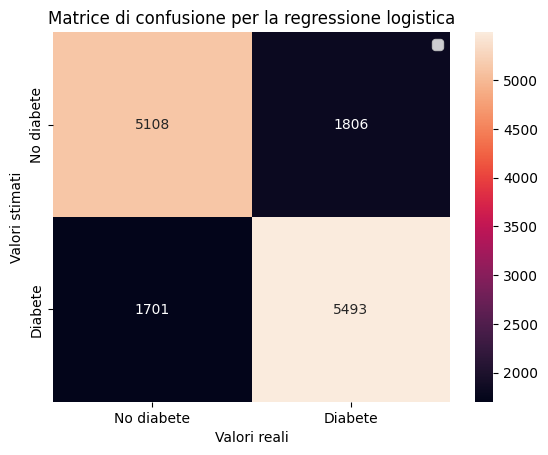

In [22]:
# MODEL ASSESMENT
# Evaluation of the model on the test set
t_hat_test = log_reg_cv.predict(X_test)
print("Metriche Test Set: \n")
print("\nAccuracy score on the test set: ", accuracy_score(t_test, t_hat_test))
print("\nf1_score on the test set: ", f1_score(t_test, t_hat_test))
print("\nClassification Report on the test set: \n", classification_report(t_test, t_hat_test))

# Creation of the confusion matrix
cm = confusion_matrix(t_test, t_hat_test)

# Definition of the labels for the x-axis and y-axis
axes_labels = ['No diabete', 'Diabete']

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', xticklabels=axes_labels, yticklabels=axes_labels)
plt.title("Matrice di confusione per la regressione logistica")
plt.xlabel('Valori reali')
plt.ylabel('Valori stimati')
plt.legend(loc="upper right", labels=["No diabete", "Diabete"])
plt.show()

### KNN

In [23]:

knn = KNeighborsClassifier()

# I define parameters to optimize
parametri = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weights of the neighbors (uniform or distance based)
    'p' : [1,2],  # Distance metric to use (1=manhattan, 2=euclidean)
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'] # Algorithm to compute the neighbors

}

# Creating GridSearchCV for the search of the best parameters
knn_cv = GridSearchCV(knn, parametri, n_jobs=-1, cv=5, scoring="f1", verbose=2)

# Load the KNN model
# with open('knn_model.pkl', 'rb') as file:
#     knn_cv = pickle.load(file)

knn_cv.fit(X_train, t_train)

# Save the KNN model
with open('knn_model.pkl', 'wb') as file:
    pickle.dump(knn_cv, file)

# Predictions on the training set
t_hat_train = knn_cv.predict(X_train)
print("Metriche Train Set: \n")
print("\nAccuracy score on the train set: ", accuracy_score(t_train, t_hat_train))
print("\nf1_score on the train set: ", f1_score(t_train, t_hat_train))
print("\nClassification Report on the train set: \n", classification_report(t_train, t_hat_train))



Fitting 5 folds for each of 64 candidates, totalling 320 fits
Metriche Train Set: 


Accuracy score on the train set:  0.7728690412900939

f1_score on the train set:  0.7781336010663157

Classification Report on the train set: 
               precision    recall  f1-score   support

         0.0       0.79      0.75      0.77     28359
         1.0       0.76      0.80      0.78     28071

    accuracy                           0.77     56430
   macro avg       0.77      0.77      0.77     56430
weighted avg       0.77      0.77      0.77     56430



Parametri Migliori: {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
F1 Score sul TEST SET: 0.7357137980473818
Accuracy Score sul TEST SET: 0.7256166713921179

Classification Report on the test set: 
               precision    recall  f1-score   support

         0.0       0.73      0.70      0.71      6914
         1.0       0.72      0.75      0.74      7194

    accuracy                           0.73     14108
   macro avg       0.73      0.73      0.73     14108
weighted avg       0.73      0.73      0.73     14108



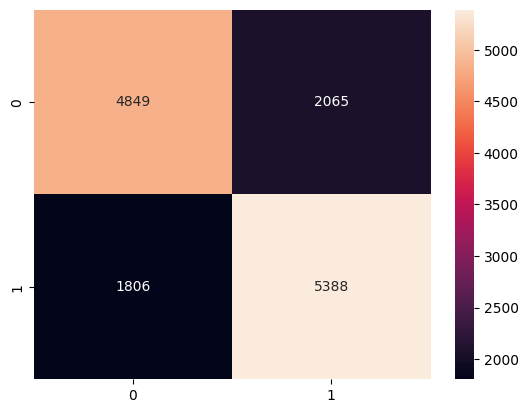

AUC: 0.7890168111680507


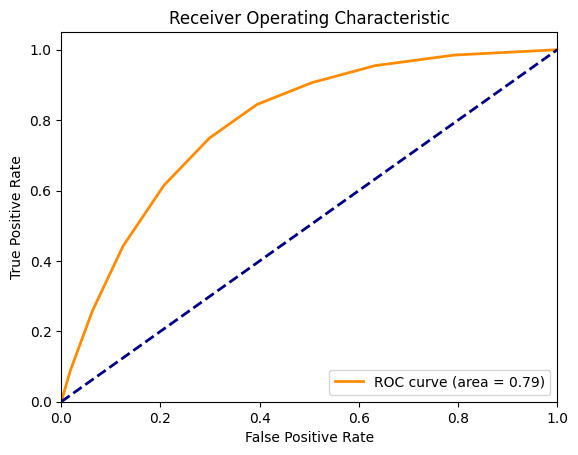

In [24]:
# MODEL ASSESMENT
t_hat_test = knn_cv.predict(X_test)

print(f"Parametri Migliori: {knn_cv.best_params_}")
print(f"F1 Score sul TEST SET: {f1_score(t_test, t_hat_test)}")
print(f"Accuracy Score sul TEST SET: {accuracy_score(t_test, t_hat_test)}")
print("\nClassification Report on the test set: \n", classification_report(t_test, t_hat_test))


cm = confusion_matrix(t_test, t_hat_test)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()


# Get the positive class membership probabilities for each example in the test set
probs = knn_cv.predict_proba(X_test)[:, 1]

# Calculates false positive rates (FPR) and true positive rates (TPR)
fpr, tpr, thresholds = roc_curve(t_test, probs)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

print(f"AUC: {roc_auc}")

# Plot the ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Support Vector Machine

In [25]:
svm = SVC()

# Parameters definition
parameters = [
    {'C': [ 1, 10], # or C represents the regularisation parameter (1/λ) because the larger C is, the less regularisation there is 
     'kernel': ['linear', 'rbf'],
     'gamma': ['auto']}

]

# Search for the best parameters
svm_cv = GridSearchCV(svm, parameters, cv=5, scoring="f1", verbose=2) 

# Load the SVM model
# with open('svm_model.pkl', 'rb') as file:
#     svm_cv = pickle.load(file)
    
# Training the model with the training data
svm_cv.fit(X_train, t_train)

# Save the SVM model
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(svm_cv, file)

# Print the best parameters found
print(f"Parametri migliori: {svm_cv.best_params_}")

print(f"\nMetriche sul Training Set: \n")
t_hat_train = svm_cv.predict(X_train)
print(f"Accuracy score sul Training Set: {accuracy_score(t_train, t_hat_train)}")
print(f"f1_score sul Training Set: {f1_score(t_train, t_hat_train)}")
print(f"Classification Report sul Training Set: \n{classification_report(t_train, t_hat_train)}")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .....................C=1, gamma=auto, kernel=linear; total time= 2.6min
[CV] END .....................C=1, gamma=auto, kernel=linear; total time= 2.5min
[CV] END .....................C=1, gamma=auto, kernel=linear; total time= 2.7min
[CV] END .....................C=1, gamma=auto, kernel=linear; total time= 2.5min
[CV] END .....................C=1, gamma=auto, kernel=linear; total time= 2.4min
[CV] END ........................C=1, gamma=auto, kernel=rbf; total time= 2.1min
[CV] END ........................C=1, gamma=auto, kernel=rbf; total time= 1.7min
[CV] END ........................C=1, gamma=auto, kernel=rbf; total time= 1.7min
[CV] END ........................C=1, gamma=auto, kernel=rbf; total time= 2.0min
[CV] END ........................C=1, gamma=auto, kernel=rbf; total time= 1.9min
[CV] END ....................C=10, gamma=auto, kernel=linear; total time=13.5min
[CV] END ....................C=10, gamma=auto, ke


Metriche sul Test Set: 

Accuracy score sul Test Set: 0.7523390983838957
f1_score sul Test Set: 0.7642056957754083
Classification Report sul Test Set: 
              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74      6914
         1.0       0.74      0.79      0.76      7194

    accuracy                           0.75     14108
   macro avg       0.75      0.75      0.75     14108
weighted avg       0.75      0.75      0.75     14108



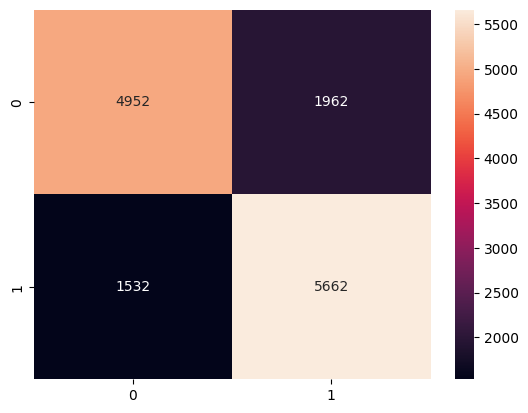

In [26]:
print(f"\nMetriche sul Test Set: \n")
t_hat_test = svm_cv.predict(X_test)
print(f"Accuracy score sul Test Set: {accuracy_score(t_test, t_hat_test)}")
print(f"f1_score sul Test Set: {f1_score(t_test, t_hat_test)}")
print(f"Classification Report sul Test Set: \n{classification_report(t_test, t_hat_test)}")

cm = confusion_matrix(t_test, t_hat_test)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

### Neural Network

In [27]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()

# Parameters definition
parameters = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [100],
    'early_stopping': [True, False]
}

# Search for the best parameters
mlp_cv = GridSearchCV(mlp, parameters, cv=5, scoring="f1", verbose=2)

# Load the MLP model
# with open('mlp_model.pkl', 'rb') as file:
#     mlp_cv = pickle.load(file)

# Training the model with the training data
mlp_cv.fit(X_train, t_train)

# Save the MLP model
with open('mlp_model.pkl', 'wb') as file:
    pickle.dump(mlp_cv, file)

print(f"Parametri migliori: {mlp_cv.best_params_}")

print(f"\nMetriche sul Training Set: \n")
t_hat_train = mlp_cv.predict(X_train)
print(f"Accuracy score sul Training Set: {accuracy_score(t_train, t_hat_train)}")
print(f"f1_score sul Training Set: {f1_score(t_train, t_hat_train)}")
print(f"Classification Report sul Training Set: \n{classification_report(t_train, t_hat_train)}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END activation=logistic, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(50,), learning_rate=constant, max_iter=100, solver=sgd; total time=  14.5s


C:\Users\lucag\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(50,), learning_rate=constant, max_iter=100, solver=sgd; total time=  20.5s
[CV] END activation=logistic, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(50,), learning_rate=constant, max_iter=100, solver=sgd; total time=  10.7s
[CV] END activation=logistic, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(50,), learning_rate=constant, max_iter=100, solver=sgd; total time=  11.1s
[CV] END activation=logistic, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(50,), learning_rate=constant, max_iter=100, solver=sgd; total time=  10.3s


C:\Users\lucag\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(50,), learning_rate=adaptive, max_iter=100, solver=sgd; total time=  20.5s


C:\Users\lucag\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(50,), learning_rate=adaptive, max_iter=100, solver=sgd; total time=  20.5s
[CV] END activation=logistic, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(50,), learning_rate=adaptive, max_iter=100, solver=sgd; total time=  19.3s


C:\Users\lucag\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(50,), learning_rate=adaptive, max_iter=100, solver=sgd; total time=  20.5s


C:\Users\lucag\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(50,), learning_rate=adaptive, max_iter=100, solver=sgd; total time=  20.5s
[CV] END activation=logistic, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=100, solver=sgd; total time=  18.0s
[CV] END activation=logistic, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=100, solver=sgd; total time=  20.2s


C:\Users\lucag\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=100, solver=sgd; total time=  35.1s
[CV] END activation=logistic, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=100, solver=sgd; total time=  17.7s
[CV] END activation=logistic, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=100, solver=sgd; total time=  25.2s


C:\Users\lucag\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=100, solver=sgd; total time=  40.2s


C:\Users\lucag\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=100, solver=sgd; total time=  39.8s


C:\Users\lucag\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=100, solver=sgd; total time=  39.3s


C:\Users\lucag\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=100, solver=sgd; total time=  40.2s


C:\Users\lucag\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=100, solver=sgd; total time=  40.6s
[CV] END activation=logistic, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(150,), learning_rate=constant, max_iter=100, solver=sgd; total time=  27.3s
[CV] END activation=logistic, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(150,), learning_rate=constant, max_iter=100, solver=sgd; total time=  28.6s
[CV] END activation=logistic, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(150,), learning_rate=constant, max_iter=100, solver=sgd; total time=  31.4s
[CV] END activation=logistic, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(150,), learning_rate=constant, max_iter=100, solver=sgd; total time=  29.5s
[CV] END activation=logistic, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(150,), learning_rate=constant, max_iter=100, solver=sgd; total time=  32.1s


C:\Users\lucag\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(150,), learning_rate=adaptive, max_iter=100, solver=sgd; total time=  48.6s


C:\Users\lucag\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(150,), learning_rate=adaptive, max_iter=100, solver=sgd; total time= 1.1min


C:\Users\lucag\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(150,), learning_rate=adaptive, max_iter=100, solver=sgd; total time= 1.9min


C:\Users\lucag\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(150,), learning_rate=adaptive, max_iter=100, solver=sgd; total time= 1.9min


C:\Users\lucag\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(150,), learning_rate=adaptive, max_iter=100, solver=sgd; total time= 1.9min


C:\Users\lucag\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(50,), learning_rate=constant, max_iter=100, solver=sgd; total time=  55.5s


C:\Users\lucag\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(50,), learning_rate=constant, max_iter=100, solver=sgd; total time=  55.0s


C:\Users\lucag\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(50,), learning_rate=constant, max_iter=100, solver=sgd; total time=  56.2s


C:\Users\lucag\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(50,), learning_rate=constant, max_iter=100, solver=sgd; total time=  55.7s


C:\Users\lucag\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(50,), learning_rate=constant, max_iter=100, solver=sgd; total time=  55.1s


C:\Users\lucag\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(50,), learning_rate=adaptive, max_iter=100, solver=sgd; total time=  54.4s


C:\Users\lucag\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(50,), learning_rate=adaptive, max_iter=100, solver=sgd; total time=  55.8s


C:\Users\lucag\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(50,), learning_rate=adaptive, max_iter=100, solver=sgd; total time=  54.6s


C:\Users\lucag\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(50,), learning_rate=adaptive, max_iter=100, solver=sgd; total time=  54.7s


C:\Users\lucag\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(50,), learning_rate=adaptive, max_iter=100, solver=sgd; total time=  55.8s


C:\Users\lucag\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=100, solver=sgd; total time= 1.8min
[CV] END activation=logistic, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=100, solver=sgd; total time= 1.6min


C:\Users\lucag\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=100, solver=sgd; total time= 1.8min


C:\Users\lucag\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=100, solver=sgd; total time= 1.8min


C:\Users\lucag\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=100, solver=sgd; total time= 1.8min



Metriche sul Test Set: 

Accuracy score sul Test Set: 0.750070881769209
f1_score sul Test Set: 0.7461117511520738
Classification Report sul Test Set: 
              precision    recall  f1-score   support

         0.0       0.73      0.78      0.75      6914
         1.0       0.77      0.72      0.75      7194

    accuracy                           0.75     14108
   macro avg       0.75      0.75      0.75     14108
weighted avg       0.75      0.75      0.75     14108



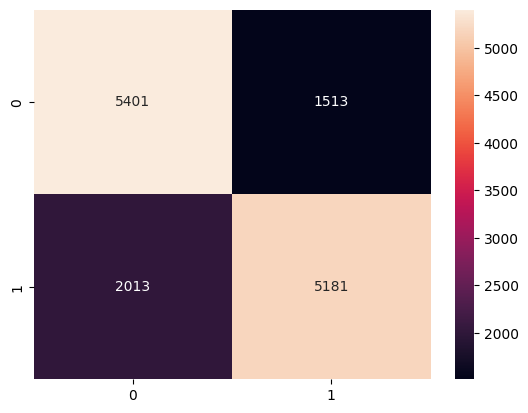

In [ ]:
print(f"\nMetriche sul Test Set: \n")
t_hat_test = mlp_cv.predict(X_test)
print(f"Accuracy score sul Test Set: {accuracy_score(t_test, t_hat_test)}")
print(f"f1_score sul Test Set: {f1_score(t_test, t_hat_test)}")
print(f"Classification Report sul Test Set: \n{classification_report(t_test, t_hat_test)}")

cm = confusion_matrix(t_test, t_hat_test)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

## Best Model

In [ ]:

results = {
    'Logistic Regression': {
        'Train Accuracy': log_reg_cv.best_score_,
        'Train F1 Score': f1_score(t_train, log_reg_cv.predict(X_train)),
        'Test Accuracy': accuracy_score(t_test, log_reg_cv.predict(X_test)),
        'Test F1 Score': f1_score(t_test, log_reg_cv.predict(X_test))
    },
    'KNN': {
        'Test Accuracy': accuracy_score(t_test, knn_cv.predict(X_test)),
        'Test F1 Score': f1_score(t_test, knn_cv.predict(X_test))
    },
    'SVM': {
        'Train Accuracy': accuracy_score(t_train, svm_cv.predict(X_train)),
        'Train F1 Score': f1_score(t_train, svm_cv.predict(X_train)),
        'Test Accuracy': accuracy_score(t_test, svm_cv.predict(X_test)),
        'Test F1 Score': f1_score(t_test, svm_cv.predict(X_test))
    },
    'Neural Networks': {
        'Train Accuracy': accuracy_score(t_train, mlp_cv.predict(X_train)),
        'Train F1 Score': f1_score(t_train, mlp_cv.predict(X_train)),
        'Test Accuracy': accuracy_score(t_test, mlp_cv.predict(X_test)),
        'Test F1 Score': f1_score(t_test, mlp_cv.predict(X_test))
    }
}

# Find the model with the best performance on the test set
best_model = max(results, key=lambda x: results[x]['Test F1 Score'])

# Print the model with the best performance
print(f"Il modello con le migliori performance sul set di test è: {best_model}")
print(f"Accuracy sul Test Set: {results[best_model]['Test Accuracy']}")
print(f"F1 Score sul Test Set: {results[best_model]['Test F1 Score']}")